In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

In [120]:
survived = pd.read_csv('./data/gender_submission.csv')
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
result = pd.read_csv('./data/gender_submission.csv')

In [121]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


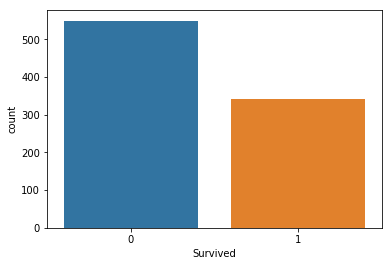

In [122]:
sns.countplot(x='Survived', data=train)

In [123]:
import re
def get_title(name): 
    return re.split(r"\,|\.", name)[1]

for data in [train, test]:
    data['Title'] = data['Name'].apply(get_title)

    data['Deck'] = data['Cabin'].str.slice(stop=1)
    data['CabinNumber'] = data['Cabin'].str.slice(start=1)

    data['Sex'] = data['Sex'].map({ 'female': 0, 'male': 1})
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
    data['Alone'] = (data['FamilySize'] == 1).apply(lambda isAlone: 1 if isAlone else 0)

In [124]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,CabinNumber,FamilySize,Alone
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.00,NaN,S,Rev,NaN,NaN,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.00,B42,S,Miss,B,42,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.45,NaN,S,Miss,NaN,NaN,4,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.00,C148,C,Mr,C,148,1,1
890,891,0,3,"Dooley, Mr. Patrick",1,32.0,0,0,370376,7.75,NaN,Q,Mr,NaN,NaN,1,1


In [125]:
train['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

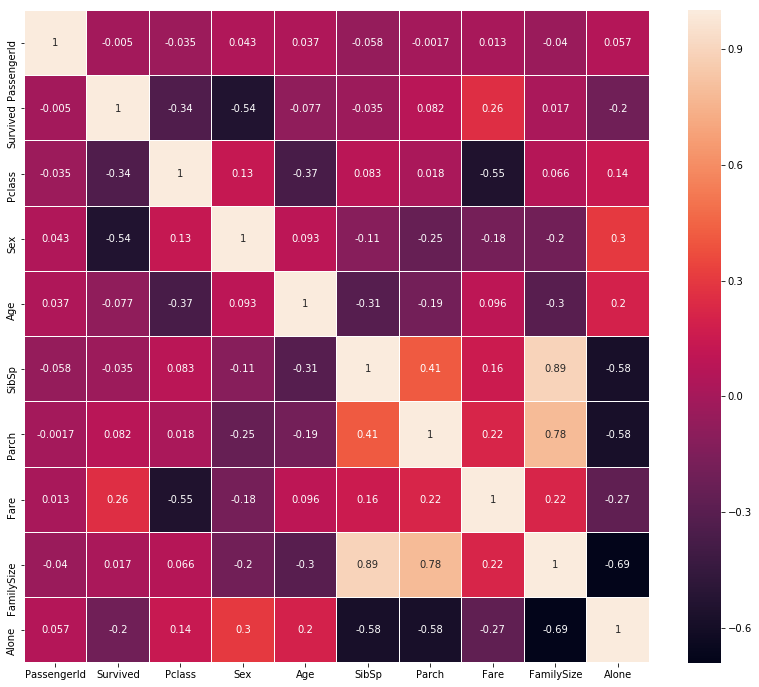

In [126]:
plt.figure(figsize=(14,12))
sns.heatmap(train.corr(), linewidths=0.1, annot=True)

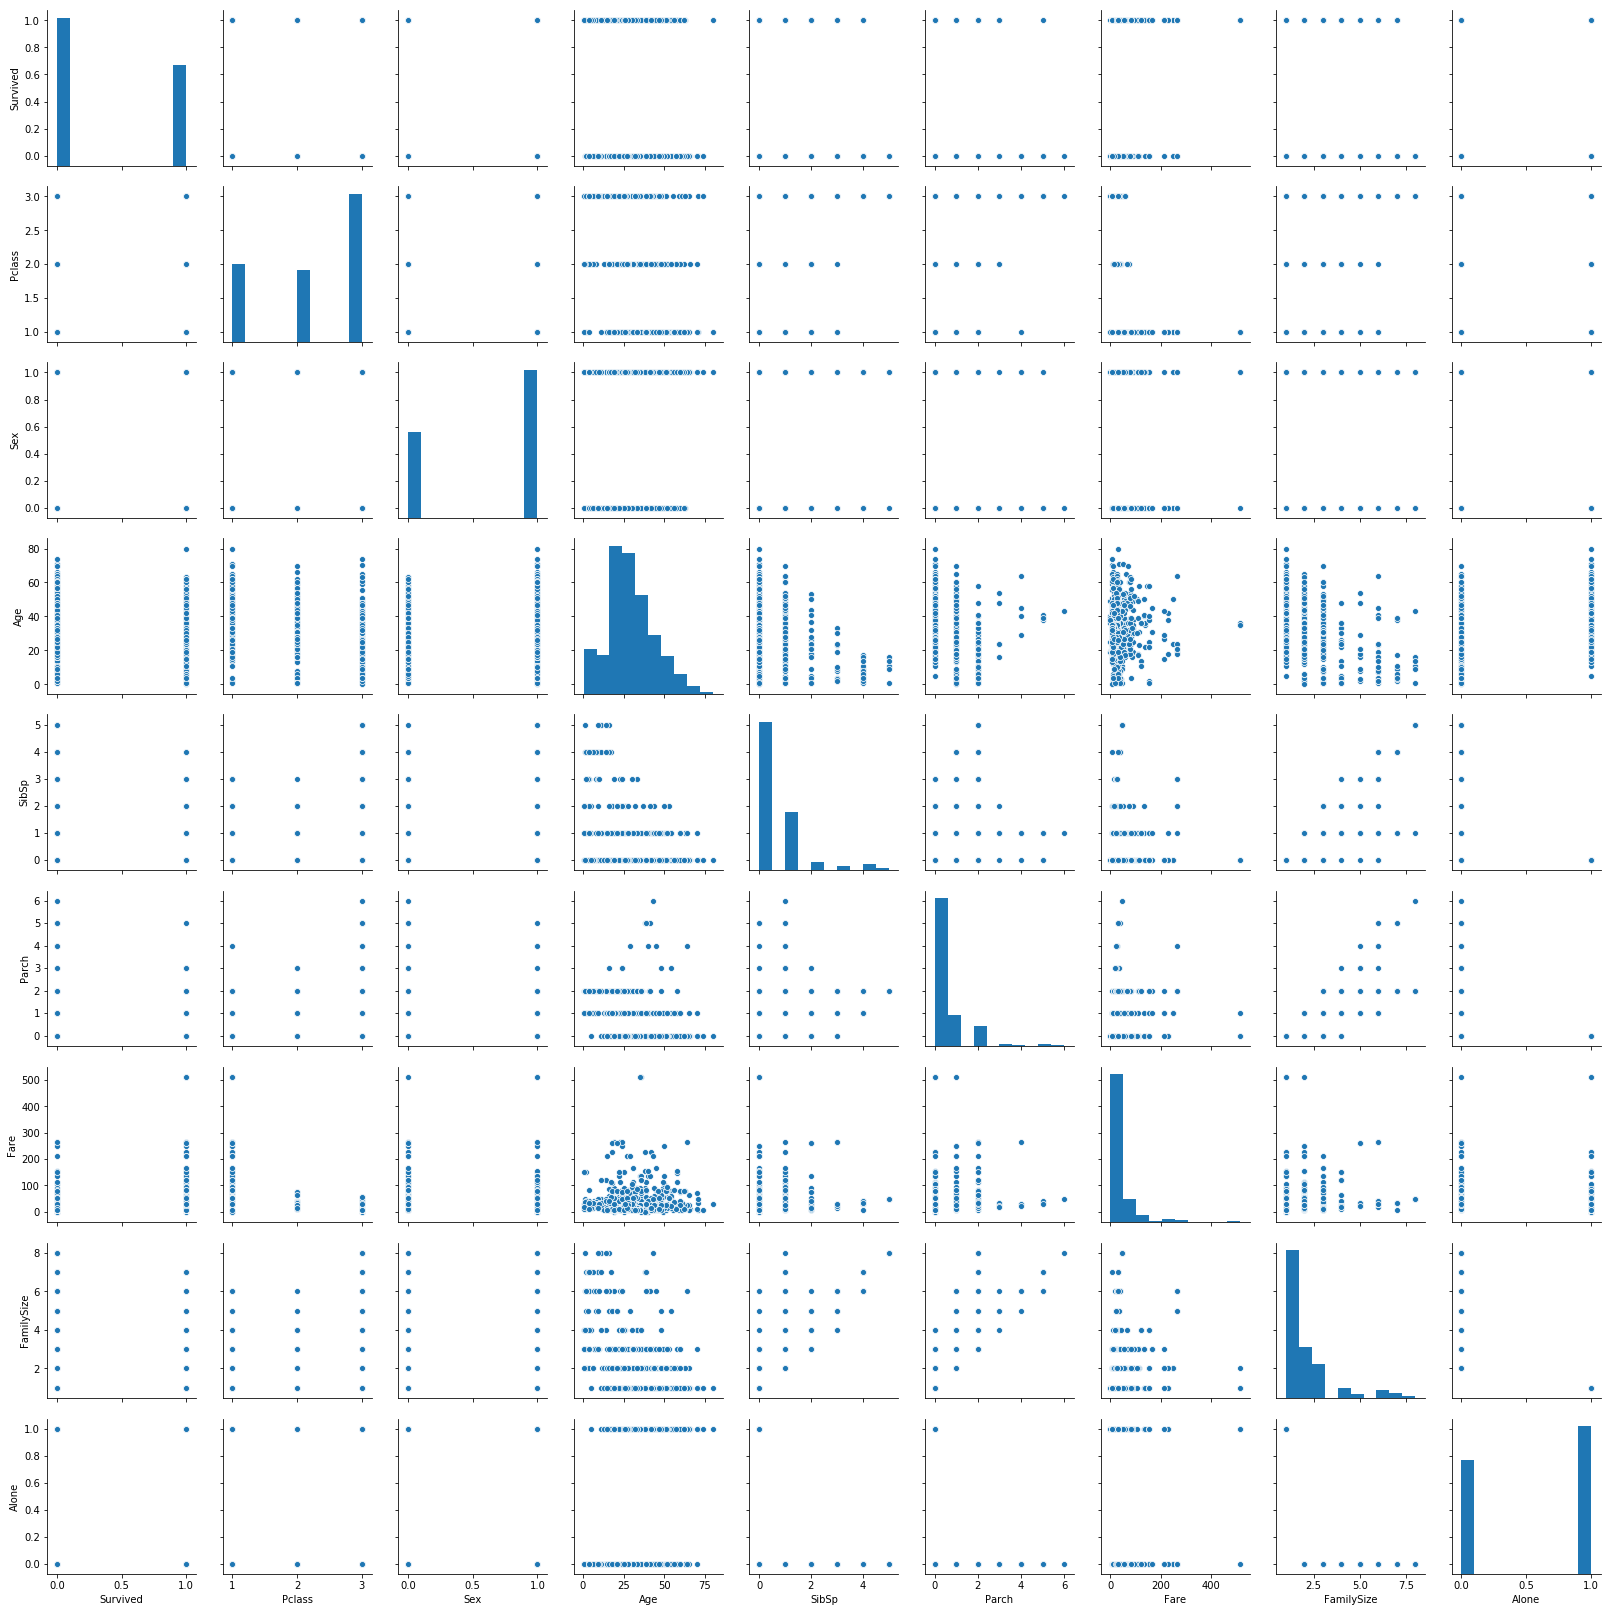

In [127]:
data = train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'Alone']].dropna()
sns.pairplot(data)

In [128]:
train = train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'Alone']]
test = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'Alone']]

In [129]:
train_y = train['Survived']
train_X = train.drop(['Survived'], axis=1)
test_X = test

my_imputer = Imputer()
train_X = my_imputer.fit_transform(train_X)
test_X = my_imputer.transform(test_X)

In [130]:
model = XGBClassifier()
model.fit(train_X, train_y, verbose=False)
predictions = model.predict(test_X)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [131]:
print(classification_report(result['Survived'], predictions))

             precision    recall  f1-score   support

          0       0.92      0.94      0.93       266
          1       0.90      0.85      0.87       152

avg / total       0.91      0.91      0.91       418

